# Importing libraries and reading data

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

training_data = []

fileptr = open("./scores.csv", 'r')
record = fileptr.readline()

while record:
    try:
        data = record.split(',')
        training_data.append((float(data[0]), float(data[1])))
    except Exception:
        pass
    record = fileptr.readline()

dependent_varriable = 0
independent_varriable = 1

# Theory
$$y(x) = \theta_1 x + \theta_2$$
## Cost function
$$\text{Cost}\left(\theta_1,\theta_2\right)=\frac{1}{2n}\sum_{i=0}^n\left(y_i - (\theta_1 x_i + \theta_2)\right)^2$$
## Gradient descent
$$\theta_1 = \theta_1 - \alpha\frac{\delta\text{Cost}\left(\theta_1,\theta_2\right)}{\delta\theta_1}$$
$$\theta_2 = \theta_2 - \alpha\frac{\delta\text{Cost}\left(\theta_1,\theta_2\right)}{\delta\theta_2}$$
$$\frac{\delta\text{Cost}\left(\theta_1,\theta_2\right)}{\delta\theta_1}= \sum_{i=0}^n\frac{\left(y_i - (\theta_1 x_i + \theta_2)\right)}{n}x_i$$
$$\frac{\delta\text{Cost}\left(\theta_1,\theta_2\right)}{\delta\theta_2}= \sum_{i=0}^n\frac{\left(y_i - (\theta_1 x_i + \theta_2)\right)}{n}$$
$\alpha=$ Learning rate

# Cost function and gradient descent

In [2]:
def costFunction(m, c):
    h = lambda x: m * x + c
    n = len(training_data) << 1
    error = sum([(h(point[independent_varriable]) - point[dependent_varriable]) ** 2 for point in training_data ])
    return error / float(n)

def gradient_descent(m_now, c_now, learning_rate):
    gradient_m, gradient_c = 0, 0
    n = float(len(training_data))
    h = lambda x: m_now * x + c_now

    for point in training_data:
        x = point[independent_varriable]
        y = point[dependent_varriable]

        factor = (h(x) - y) / n
        gradient_c += factor
        gradient_m += (factor * x)

    m_now -= (learning_rate * gradient_m)
    c_now -= (learning_rate * gradient_c)

    return m_now, c_now

# Driver code

Best fit line: 0.09777254190391285 * x + 0.0013390839042747838



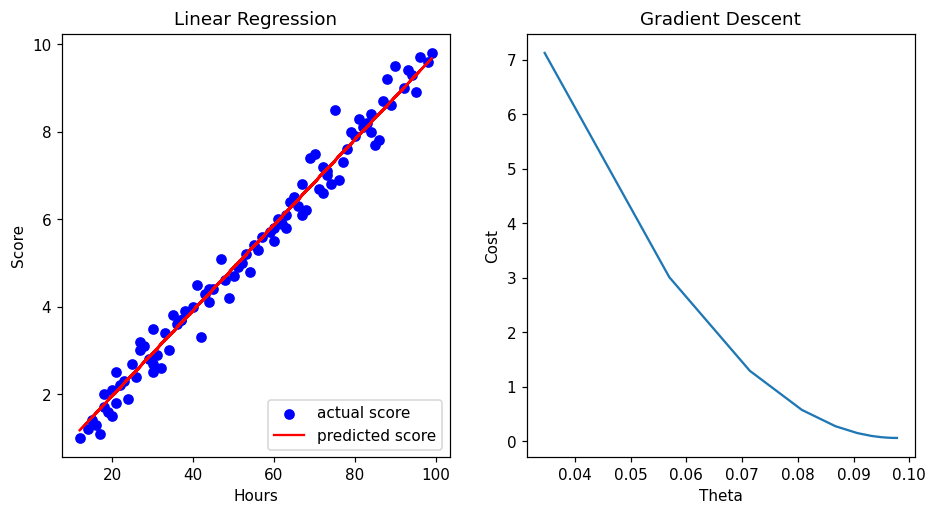

In [3]:
if __name__ == "__main__":
    m = 0
    c = 0
    L = 10 ** -4
    iterations = 10 ** 2

    costs = []
    theta = []
    
    for i in range(iterations):
        m, c = gradient_descent(m, c, L)
        theta.append(m)
        costs.append(costFunction(m, c))
    
    x_axis = []
    y_axis = []
    for points in training_data:
        y_axis.append(points[dependent_varriable])
        x_axis.append(points[independent_varriable])
    
    print(f"Best fit line: {m} * x + {c}\n")

    figure(figsize=(10,5), dpi=110)

    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.scatter(x_axis, y_axis, color = 'blue', label = 'actual score')
    plt.plot(x_axis, [m * x + c for x in x_axis], color = 'red', label = 'predicted score')
    plt.xlabel("Hours")
    plt.ylabel("Score")
    plt.title("Linear Regression")
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2) # index 2
    plt.plot(theta, costs)
    plt.title("Gradient Descent")
    plt.xlabel("Theta")
    plt.ylabel("Cost")
    plt.show()

***